In [26]:
import pandas as pd


In [27]:
# Sadece egitim ve tahminleme islemlerinde gereken column'lar aliniyor.
df = pd.read_csv("processed_dataset.csv")

In [28]:
mapping = {
    "A": 6,
    "B": 5,
    "C": 4,
    "D": 3,
    "E": 2,
    "F": 1,
    "G": 0
}
df['loan_grade'] = df["loan_grade"].map(mapping)

In [29]:
df.describe(include="all")

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_encoded,log_person_age,log_income
count,31743.000000,31743.000000,31743.000000,31743.000000,31743.000000,31743.000000,31743,31743.000000,31743,31743.000000,...,31743,31743,31743,31743,31743,31743,31743,31743.000000,31743.000000,31743.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,...,2,2,2,2,2,2,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,...,True,False,False,False,False,False,False,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,24952,NaN,26166,NaN,...,16122,26658,25443,28232,25824,26367,26191,NaN,NaN,NaN
mean,27.701887,63273.934442,4.789899,4.783826,9571.057398,11.008214,NaN,0.170404,NaN,5.786567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.216174,3.300605,10.921995
std,6.214245,34416.854705,4.078478,1.165778,6232.734454,3.215079,NaN,0.105844,NaN,4.035993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165778,0.196459,0.517182
min,20.000000,13200.000000,0.000000,0.000000,500.000000,5.420000,NaN,0.010000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.995732,9.488048
25%,23.000000,39000.000000,2.000000,4.000000,5000.000000,7.880000,NaN,0.090000,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.135494,10.571343
50%,26.000000,55000.000000,4.000000,5.000000,8000.000000,10.990000,NaN,0.150000,NaN,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.258097,10.915107
75%,30.000000,78000.000000,7.000000,6.000000,12000.000000,13.480000,NaN,0.230000,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.401197,11.264477


In [30]:

train_cols = [
    "log_income",
    "log_person_age",
    "person_income",
    "person_age",
    "person_emp_length",
    "loan_amnt",
    "loan_intent_VENTURE",
    "loan_intent_PERSONAL",
    "loan_intent_MEDICAL",
    "loan_intent_HOMEIMPROVEMENT",
    "loan_intent_EDUCATION",
    "person_home_ownership_OWN",
    "person_home_ownership_RENT",
    "person_home_ownership_MORTGAGE",
    "cb_person_default_on_file",
    "loan_percent_income"
]

predict_cols = [
    "loan_grade"
]


df = df[[*predict_cols, *train_cols]].astype(float)

In [31]:
summary = pd.DataFrame({
    'min': df.min(),
    'max': df.max(),
    'mean': df.mean()
})
print(summary)

                                         min            max          mean
loan_grade                          0.000000       6.000000      4.783826
log_income                          9.488048      12.358798     10.921995
log_person_age                      2.995732       4.605170      3.300605
person_income                   13200.000000  233000.000000  63273.934442
person_age                         20.000000     100.000000     27.701887
person_emp_length                   0.000000     123.000000      4.789899
loan_amnt                         500.000000   35000.000000   9571.057398
loan_intent_VENTURE                 0.000000       1.000000      0.174905
loan_intent_PERSONAL                0.000000       1.000000      0.169360
loan_intent_MEDICAL                 0.000000       1.000000      0.186466
loan_intent_HOMEIMPROVEMENT         0.000000       1.000000      0.110607
loan_intent_EDUCATION               0.000000       1.000000      0.198469
person_home_ownership_OWN           0.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont_cols = [
    "log_income",
    "log_person_age",
    "loan_percent_income",
    "person_income",
    "person_age",
    "person_emp_length",
    "loan_amnt",
]

target_df = df[cont_cols]
df_temp = df.drop(columns=cont_cols)
scaler.fit(target_df)
target_df = pd.DataFrame(
    scaler.transform(target_df),
    columns=target_df.columns
)
df = pd.concat([target_df, df_temp], axis=1)

In [33]:
summary = pd.DataFrame({
    'min': df.min(),
    'max': df.max(),
    'mean': df.mean()
})
print(summary)

                                     min        max          mean
log_income                     -2.772662   2.778184 -2.492708e-15
log_person_age                 -1.551861   6.640501 -3.552826e-15
loan_percent_income            -1.515502   6.231904 -2.865182e-16
person_income                  -1.454948   4.931559  7.162955e-17
person_age                     -1.239412  11.634438  5.730364e-17
person_emp_length              -1.174451  28.984329 -2.865182e-17
loan_amnt                      -1.455413   4.079966  8.595546e-17
loan_grade                      0.000000   6.000000  4.783826e+00
loan_intent_VENTURE             0.000000   1.000000  1.749047e-01
loan_intent_PERSONAL            0.000000   1.000000  1.693602e-01
loan_intent_MEDICAL             0.000000   1.000000  1.864663e-01
loan_intent_HOMEIMPROVEMENT     0.000000   1.000000  1.106071e-01
loan_intent_EDUCATION           0.000000   1.000000  1.984690e-01
person_home_ownership_OWN       0.000000   1.000000  7.812746e-02
person_hom

In [34]:
from sklearn.model_selection import train_test_split

X = df[train_cols]
y = df[predict_cols].values.ravel()

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42
)

print(f"Train size: {len(X_train)}")
print(f"Val size: {len(X_val)}")
print(f"Test size: {len(X_test)}")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts().sort_index())

Train size: 22854
Val size: 5714
Test size: 3175

Class distribution in training set:
0.0      46
1.0     169
2.0     669
3.0    2540
4.0    4530
5.0    7320
6.0    7580
Name: count, dtype: int64


In [35]:
def evaluate_model(y_true, y_pred, model_name):
    from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, mean_absolute_error
    """Calculate 4 different metrics for model evaluation"""
    # 1. Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # 2. Weighted F1 Score (handles class imbalance)
    f1 = f1_score(y_true, y_pred, average='weighted')

    # 3. Cohen's Kappa (measures agreement beyond chance)
    kappa = cohen_kappa_score(y_true, y_pred)

    # 4. Mean Absolute Error (important for ordinal data)
    mae = mean_absolute_error(y_true, y_pred)

    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Weighted F1': f1,
        'Cohen Kappa': kappa,
        'MAE': mae
    }

    return results

In [36]:
from sklearn.ensemble import RandomForestClassifier
import joblib

print("\n" + "=" * 50)
print("MODEL 1: Random Forest Classifier")
print("=" * 50)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_results = evaluate_model(y_test, rf_pred, "Random Forest")

print(f"Accuracy: {rf_results['Accuracy']:.4f}")
print(f"Weighted F1: {rf_results['Weighted F1']:.4f}")
print(f"Cohen Kappa: {rf_results['Cohen Kappa']:.4f}")
print(f"MAE: {rf_results['MAE']:.4f}")


MODEL 1: Random Forest Classifier
Accuracy: 0.4674
Weighted F1: 0.4620
Cohen Kappa: 0.2590
MAE: 0.7798


In [37]:
X_train

,log_income,log_person_age,person_income,person_age,person_emp_length,loan_amnt,loan_intent_VENTURE,loan_intent_PERSONAL,loan_intent_MEDICAL,loan_intent_HOMEIMPROVEMENT,loan_intent_EDUCATION,person_home_ownership_OWN,person_home_ownership_RENT,person_home_ownership_MORTGAGE,cb_person_default_on_file,loan_percent_income
6349,-0.197606,-0.623808,-0.385687,-0.595719,0.051515,-0.733407,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.665177
27651,-0.197606,0.997186,-0.385687,0.852589,0.541902,0.068822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.279629
7035,0.560429,-0.840445,0.311656,-0.756642,0.541902,-0.412515,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.759657
26628,1.574099,-0.024269,1.793512,-0.112950,1.522675,1.027485,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.381735
2509,-0.629064,-0.623808,-0.676247,-0.595719,-0.929258,-1.054298,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.948618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,-0.832783,-0.416016,-0.792471,-0.434796,-1.174451,-0.332292,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.374109
19538,-1.930988,0.678944,-1.245745,0.530743,-1.174451,-0.909897,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.185148
13424,1.043456,-0.840445,0.921832,-0.756642,-0.193678,-0.829674,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.137579
19646,-1.250589,0.160850,-0.995747,0.047973,-1.174451,-0.893852,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.287254


In [38]:
import numpy as np
import xgboost as xgb


print("\n" + "=" * 50)
print("MODEL 2: XGBoost Classifier")
print("=" * 50)

# Calculate class weights for XGBoost
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
sample_weights = np.array([class_weights[int(y)] for y in y_train])

xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=7,
    random_state=42,
    early_stopping_rounds=50,
)

xgb_model.fit(
    X_train, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_val, y_val)],
    verbose=False,
)

xgb_pred = xgb_model.predict(X_test)
xgb_results = evaluate_model(y_test, xgb_pred, "XGBoost")

print(f"Accuracy: {xgb_results['Accuracy']:.4f}")
print(f"Weighted F1: {xgb_results['Weighted F1']:.4f}")
print(f"Cohen Kappa: {xgb_results['Cohen Kappa']:.4f}")
print(f"MAE: {xgb_results['MAE']:.4f}")


MODEL 2: XGBoost Classifier
Accuracy: 0.4813
Weighted F1: 0.4768
Cohen Kappa: 0.2819
MAE: 0.7534


In [39]:
import torch
from nn_model import OrdinalNN
import torch.optim as optim

print("\n" + "=" * 50)
print("MODEL 3: Neural Network (Ordinal)")
print("=" * 50)

# Convert to PyTorch tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long, device=device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32, device=device)

# Training
ordinal_model = OrdinalNN(X_train_tensor.shape[1], 7).to(device)
optimizer = optim.Adam(ordinal_model.parameters(), lr=0.001)


# Custom loss for ordinal regression
def ordinal_loss(logits, targets, num_classes=7):
    """Custom loss for ordinal regression"""
    import torch.nn.functional as F
    batch_size = targets.shape[0]
    loss = 0

    for i in range(num_classes - 1):
        # Create binary targets for each threshold
        binary_target = (targets > i).float()
        binary_logit = logits[:, i]
        loss += F.binary_cross_entropy_with_logits(binary_logit, binary_target)

    return loss / (num_classes - 1)


# Train the model
ordinal_model.train()
for epoch in range(200):
    optimizer.zero_grad()
    logits, _ = ordinal_model(X_train_tensor)
    loss = ordinal_loss(logits, y_train_tensor.float())
    loss.backward()
    optimizer.step()

# Evaluate
ordinal_model.eval()
with torch.no_grad():
    _, predictions = ordinal_model(X_test_tensor)
    nn_ordinal_pred = predictions.cpu().numpy()

nn_ordinal_results = evaluate_model(y_test, nn_ordinal_pred, "Neural Network (Ordinal)")

print(f"Accuracy: {nn_ordinal_results['Accuracy']:.4f}")
print(f"Weighted F1: {nn_ordinal_results['Weighted F1']:.4f}")
print(f"Cohen Kappa: {nn_ordinal_results['Cohen Kappa']:.4f}")
print(f"MAE: {nn_ordinal_results['MAE']:.4f}")


MODEL 3: Neural Network (Ordinal)
Accuracy: 0.4926
Weighted F1: 0.4575
Cohen Kappa: 0.2769
MAE: 0.6529


In [40]:
print(X_train_tensor.shape[1], 7)

16 7


In [41]:
from sklearn.ensemble import  GradientBoostingClassifier


print("\n" + "=" * 50)
print("MODEL 4: Gradient Boosting (Ordinal)")
print("=" * 50)

# Use GradientBoostingClassifier with ordinal-aware settings
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_results = evaluate_model(y_test, gb_pred, "Gradient Boosting")

print(f"Accuracy: {gb_results['Accuracy']:.4f}")
print(f"Weighted F1: {gb_results['Weighted F1']:.4f}")
print(f"Cohen Kappa: {gb_results['Cohen Kappa']:.4f}")
print(f"MAE: {gb_results['MAE']:.4f}")


MODEL 4: Gradient Boosting (Ordinal)
Accuracy: 0.5159
Weighted F1: 0.4965
Cohen Kappa: 0.3124
MAE: 0.6781


In [42]:
from sklearn.svm import SVC


print("\n" + "=" * 50)
print("MODEL 5: Support Vector Machine (RBF)")
print("=" * 50)

# SVM with class weights
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)

# Note: SVM can be slow, so we'll use a subset for training if needed
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_results = evaluate_model(y_test, svm_pred, "SVM (RBF)")

print(f"Accuracy: {svm_results['Accuracy']:.4f}")
print(f"Weighted F1: {svm_results['Weighted F1']:.4f}")
print(f"Cohen Kappa: {svm_results['Cohen Kappa']:.4f}")
print(f"MAE: {svm_results['MAE']:.4f}")


MODEL 5: Support Vector Machine (RBF)
Accuracy: 0.4016
Weighted F1: 0.4151
Cohen Kappa: 0.2019
MAE: 1.1304


In [43]:
import pandas as pd

print("\n" + "=" * 50)
print("SUMMARY OF ALL MODELS")
print("=" * 50)

results_df = pd.DataFrame([
    rf_results,
    xgb_results,
    nn_ordinal_results,
    gb_results,
    svm_results
])

# Sort by accuracy
results_df = results_df.sort_values('Accuracy', ascending=False)

print(results_df.to_string(index=False))

# Find best model for each metric
print("\n" + "=" * 50)
print("BEST MODEL FOR EACH METRIC")
print("=" * 50)

for metric in ['Accuracy', 'Weighted F1', 'Cohen Kappa', 'MAE']:
    if metric == 'MAE':
        best_idx = results_df[metric].idxmin()
        print(f"Best {metric}: {results_df.loc[best_idx, 'Model']} ({results_df.loc[best_idx, metric]:.4f})")
    else:
        best_idx = results_df[metric].idxmax()
        print(f"Best {metric}: {results_df.loc[best_idx, 'Model']} ({results_df.loc[best_idx, metric]:.4f})")


SUMMARY OF ALL MODELS
                   Model  Accuracy  Weighted F1  Cohen Kappa      MAE
       Gradient Boosting  0.515906     0.496532     0.312362 0.678110
Neural Network (Ordinal)  0.492598     0.457488     0.276876 0.652913
                 XGBoost  0.481260     0.476817     0.281851 0.753386
           Random Forest  0.467402     0.462011     0.259016 0.779843
               SVM (RBF)  0.401575     0.415091     0.201930 1.130394

BEST MODEL FOR EACH METRIC
Best Accuracy: Gradient Boosting (0.5159)
Best Weighted F1: Gradient Boosting (0.4965)
Best Cohen Kappa: Gradient Boosting (0.3124)
Best MAE: Neural Network (Ordinal) (0.6529)


In [50]:
import pandas as pd
import torch
import torch.nn as nn


print("\n" + "=" * 50)
print("FEATURE IMPORTANCE (Top 10)")
print("=" * 50)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': train_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10).to_string(index=False))


FEATURE IMPORTANCE (Top 10)
                   feature  importance
                 loan_amnt    0.159216
                log_income    0.133237
             person_income    0.132911
       loan_percent_income    0.130605
         person_emp_length    0.100609
 cb_person_default_on_file    0.096040
                person_age    0.076044
            log_person_age    0.075645
person_home_ownership_RENT    0.015207
       loan_intent_VENTURE    0.014331


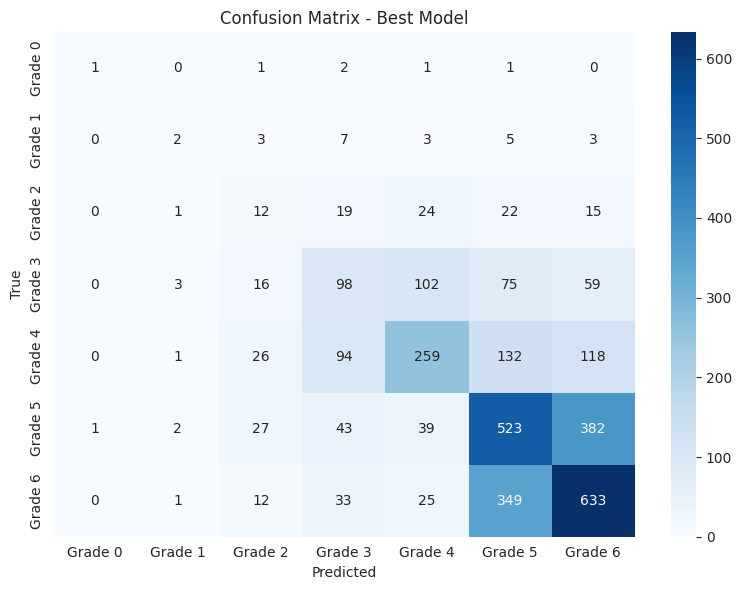

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming XGBoost is the best (you can change this based on results)
best_pred = xgb_pred  # Change this to the best model's predictions

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Grade {i}" for i in range(7)],
            yticklabels=[f"Grade {i}" for i in range(7)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Model')
plt.tight_layout()
plt.show()

In [46]:
# Save Models
import joblib
import os

if not os.path.exists("models"):
    os.mkdir("models")

joblib.dump(rf_model, "models/rf-model.pkl")
joblib.dump(svm_model, "models/svm-model.pkl")
joblib.dump(gb_model, "models/gb-model.pkl")
joblib.dump(scaler, "models/scaler.pkl")
xgb_model.save_model("models/xgb-model.ubj")
torch.save(ordinal_model.state_dict(), "models/nn-model.pth")